In [58]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import scale

First we read the file from the .csv, and we print it out to be sure it was properly imported

In [59]:
df = pd.read_csv("https://github.com/mpourhoma/CS4661/raw/master/Heart_short.csv")
df[0::10]

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
10,57,140,192,0,148,0.4,No
20,64,110,211,2,144,1.8,No
30,69,140,239,0,151,1.8,No
40,40,140,199,0,178,1.4,No
50,51,125,213,2,125,1.4,No
60,39,140,321,2,182,0.0,No
70,62,130,231,0,146,1.8,No
80,57,128,303,2,159,0.0,No
90,52,118,186,2,190,0.0,No


Next we create the x and y labels, and scale the x label.

In [60]:
feat_cols = ["Age", "RestBP", "Chol", "RestECG", "MaxHR", "Oldpeak"]
x = df[feat_cols] 
y = df["AHD"] 

x = scale(x)
labels = np.where(y.values == 'Yes', 1, 0)
y = pd.Series(labels, y.index)
#x
#y

Next we split the data into training and testing sets

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 3)

Next, we use Logistic Regresssion to predict using our new training and testing data

In [62]:
myLR = LogisticRegression()
myLR.fit(x_train, y_train)
y_predict = myLR.predict(x_test)
accuracy = accuracy_score(y_test, y_predict)

#print(y_predict)
print(accuracy)

0.7183098591549296


Here we calculate the AUC

In [63]:
y_predict_prob_lr = myLR.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)
AUC = metrics.auc(fpr, tpr)
#print(fpr)
#print(tpr)
print(AUC)

0.7650406504065042


Lastly we plot the ROC Curve

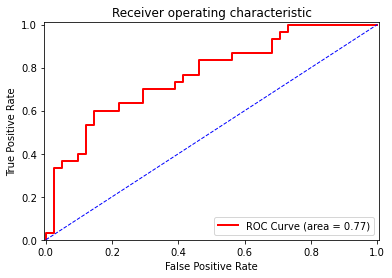

In [64]:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()